In [1]:
%pylab inline
import pandas
import seaborn

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = pandas.read_csv('Desktop/uber-raw-data-may14.csv')

In [3]:
data.head()

,Date/Time,Lat,Lon,Base
0,5/1/2014 0:02:00,40.7521,-73.9914,B02512
1,5/1/2014 0:06:00,40.6965,-73.9715,B02512
2,5/1/2014 0:15:00,40.7464,-73.9838,B02512
3,5/1/2014 0:17:00,40.7463,-74.0011,B02512
4,5/1/2014 0:17:00,40.7594,-73.9734,B02512


In [4]:
data['Date/Time'] = data['Date/Time'].map(pandas.to_datetime)

In [5]:
data.head()

,Date/Time,Lat,Lon,Base
0,2014-05-01 00:02:00,40.7521,-73.9914,B02512
1,2014-05-01 00:06:00,40.6965,-73.9715,B02512
2,2014-05-01 00:15:00,40.7464,-73.9838,B02512
3,2014-05-01 00:17:00,40.7463,-74.0011,B02512
4,2014-05-01 00:17:00,40.7594,-73.9734,B02512


In [6]:
def get_date(dt):
    return dt.day
data['date'] = data['Date/Time'].map(get_date)

In [7]:
def get_weekday(dt):
    return dt.weekday()
data['weekday'] = data['Date/Time'].map(get_weekday)

In [8]:
def get_hour(dt):
    return dt.hour
data['hours'] = data['Date/Time'].map(get_hour)

In [9]:
data.tail()

,Date/Time,Lat,Lon,Base,date,weekday,hours
652430,2014-05-31 23:45:00,40.7309,-74.0014,B02764,31,5,23
652431,2014-05-31 23:52:00,40.7528,-73.9798,B02764,31,5,23
652432,2014-05-31 23:55:00,40.7158,-73.9519,B02764,31,5,23
652433,2014-05-31 23:56:00,40.6961,-73.8997,B02764,31,5,23
652434,2014-05-31 23:59:00,40.7393,-73.9919,B02764,31,5,23


Text(0.5, 1.0, 'Frequency by Date - uber - May 2014')

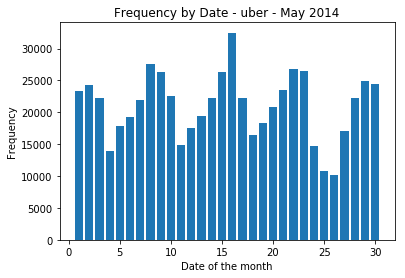

In [22]:
hist(data.date, bins=30, rwidth=0.8, range=(0.5,30.5))
xlabel('Date of the month')
ylabel('Frequency')
title('Frequency by Date - uber - May 2014')

In [15]:
def count_rows(rows):
    return len(rows)
num = data.groupby('date').apply(count_rows)
num

date
1     23375
2     24235
3     22234
4     13918
5     17859
6     19300
7     21891
8     27513
9     26385
10    22550
11    14901
12    17470
13    19498
14    22218
15    26301
16    32493
17    22294
18    16508
19    18315
20    20860
21    23508
22    26802
23    26465
24    14651
25    10841
26    10202
27    17004
28    22240
29    24930
30    24413
31    21261
dtype: int64

In [16]:
s = num.sort_values()
s

date
26    10202
25    10841
4     13918
24    14651
11    14901
18    16508
27    17004
12    17470
5     17859
19    18315
6     19300
13    19498
20    20860
31    21261
7     21891
14    22218
3     22234
28    22240
17    22294
10    22550
1     23375
21    23508
2     24235
30    24413
29    24930
15    26301
9     26385
23    26465
22    26802
8     27513
16    32493
dtype: int64

Text(0.5, 1.0, 'Frequency by DoM - uber - May 2014')

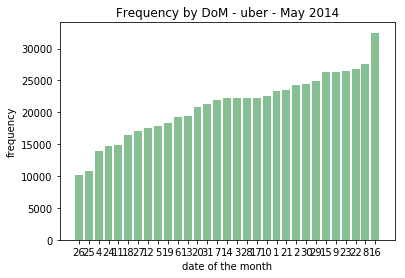

In [21]:
bar(range(0,31), s,color='#86bf91')
xticks(range(0,31), s.index)
xlabel('date of the month')
ylabel('frequency')
title('Frequency by DoM - uber - May 2014')

(array([13875.,  8186.,  5372.,  5946.,  6945., 10789., 21015., 27413.,
        25460., 20507., 20801., 22055., 23595., 27699., 34363., 43087.,
        49127., 51508., 48965., 42387., 40731., 42217., 35556., 24836.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24.]),
 <a list of 24 Patch objects>)

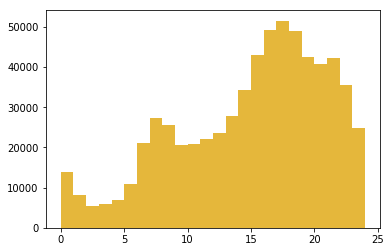

In [18]:
hist(data.hours, bins=24, range=(0, 24),color='#e5b73b')

([<matplotlib.axis.XTick at 0x1ad11be73c8>,
 <a list of 7 Text xticklabel objects>)

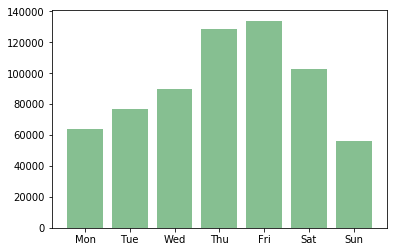

In [19]:
hist(data.weekday, bins=7, range =(-.5,6.5), rwidth=.8, color='#86bf91')
xticks(range(7), 'Mon Tue Wed Thu Fri Sat Sun'.split())

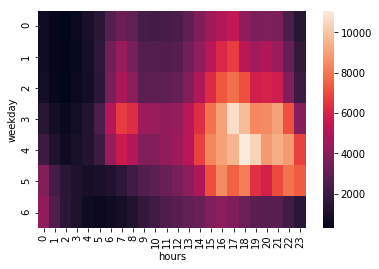

In [20]:
cross = data.groupby('weekday hours'.split()).apply(count_rows).unstack()
seaborn.heatmap(cross)